<a href="https://colab.research.google.com/github/Crisrioja/Metodos-numericos/blob/main/Chevyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Nodos de Chebyshev

Nodos de Chebyshev  en el intervalo [-1, 1]:
x_1 = 1.0*cos(pi/22)
x_2 = 1.0*cos(3*pi/22)
x_3 = 1.0*cos(5*pi/22)
x_4 = 1.0*cos(7*pi/22)
x_5 = 1.0*sin(pi/11)
x_6 = 0
x_7 = -1.0*sin(pi/11)
x_8 = -1.0*cos(7*pi/22)
x_9 = -1.0*cos(5*pi/22)
x_10 = -1.0*cos(3*pi/22)
x_11 = -1.0*cos(pi/22)


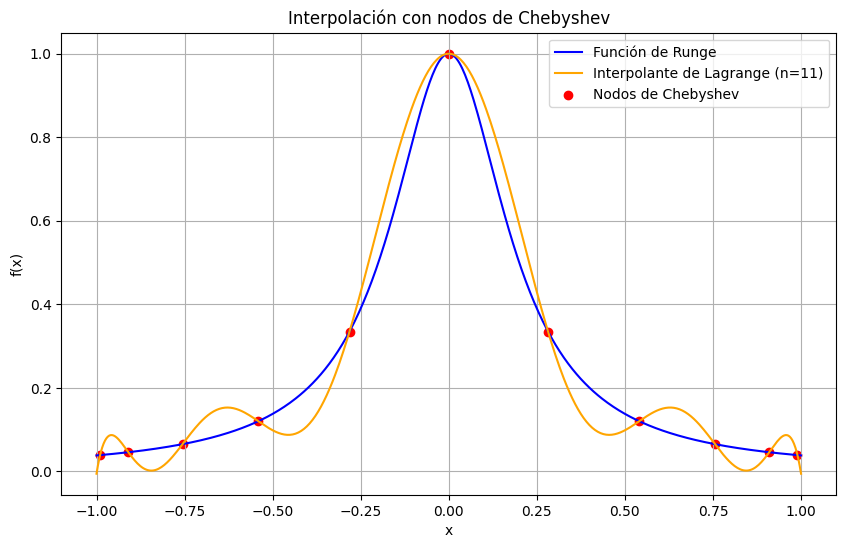

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Define la función de Runge
def runge(x):
    return 1 / (1 + 25 * x**2)

#Nodos de Chebyshev en [a, b]
def nodoschebyshev(n, a, b):
    k = np.arange(1, n+1)
    x_cheb = np.cos((2*k - 1) * np.pi / (2 * n))
    # Transforma a intervalo [a, b]
    return 0.5*(a + b) + 0.5*(b - a)*x_cheb

#Interpolación de Lagrange con sympy
def lagrange(valoresx, valoresy):
    x = sp.Symbol('x')
    n = len(valoresx)
    P = 0
    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - valoresx[j]) / (valoresx[i] - valoresx[j])
        P += valoresy[i] * L_i
    return sp.simplify(P)

#Parámetros
a, b = -1, 1
n = 11  # Número de nodos de Chebyshev

#Calcula nodos y valores
nodosx = nodoschebyshev(n, a, b)
nodosy = runge(nodosx)

x_sym = sp.Symbol('x')
cheb_sym = [sp.cos((2*i - 1) * sp.pi / (2 * n)) for i in range(1, n+1)]
nodosx_sym = [sp.simplify(0.5 * (a + b) + 0.5 * (b - a) * xi) for xi in cheb_sym]

print(f"Nodos de Chebyshev  en el intervalo [{a}, {b}]:")
for i, xi in enumerate(nodosx_sym, start=1):
    print(f"x_{i} =", xi)

#Obtiene polinomio interpolante
P = lagrange(nodosx, nodosy)
P_func = sp.lambdify(sp.Symbol('x'), P, modules='numpy')

#Grafica
x_plot = np.linspace(a, b, 500)
y_plot = runge(x_plot)
y_interp = P_func(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Función de Runge', color='blue')
plt.plot(x_plot, y_interp, label=f'Interpolante de Lagrange (n={n})', color='orange')
plt.scatter(nodosx, nodosy, color='red', label='Nodos de Chebyshev')
plt.title('Interpolación con nodos de Chebyshev')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()